In [1]:
#Classifier takes integers and regressor takes floats
import pandas as pd
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB   
import statsmodels.api as sm
pd.set_option('display.max_columns', None)


In [2]:
path = "resources/telecom_cleaned.csv"
df = pd.read_csv(path)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5973,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5974,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [3]:
#Dropping based on no internet service
df.drop(df.loc[df['OnlineSecurity']=='No internet service'].index, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50
5,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,89.40,6376.55
5970,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.10
5971,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5972,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30


In [4]:
#inverse_transform(y) <-- How to turn labels back
label = LabelEncoder()
df = pd.get_dummies(df)
df


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,44,88.15,3973.20,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
5,0,70,49.85,3370.20,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,0,72,89.40,6376.55,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
5970,0,1,25.10,25.10,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
5971,0,1,95.00,95.00,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0
5972,0,23,91.10,2198.30,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0


In [5]:
#Convert df to csv
df.to_csv("cleaned_csv", index=False)

In [6]:
#Correlation matrix
corrMatrix = df.corr()
corrMatrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,-0.010563,0.125789,0.024938,0.013170,-0.013170,-0.017146,0.017146,0.210628,-0.210628,-0.043601,0.043601,-0.074323,-0.043601,0.101599,-0.200754,0.200754,0.109098,-0.109098,0.008116,-0.008116,0.009316,-0.009316,0.136031,-0.136031,-0.029881,0.029881,-0.044983,0.044983,0.124607,-0.046038,-0.107685,-0.119536,0.119536,-0.025954,-0.037350,0.135489,-0.110904
tenure,-0.010563,1.000000,0.380013,0.932021,-0.006430,0.006430,-0.392949,0.392949,-0.178744,0.178744,-0.019292,0.019292,-0.328564,-0.019292,0.334185,-0.007842,0.007842,-0.381444,0.381444,-0.418079,0.418079,-0.424565,0.424565,-0.377974,0.377974,-0.331602,0.331602,-0.346414,0.346414,-0.683410,0.269682,0.572962,0.007383,-0.007383,0.227736,0.242240,-0.252124,-0.193767
MonthlyCharges,0.125789,0.380013,1.000000,0.618188,0.018226,-0.018226,-0.180160,0.180160,0.013473,-0.013473,-0.600435,0.600435,-0.161153,-0.600435,0.555569,-0.754060,0.754060,-0.084038,0.084038,-0.256858,0.256858,-0.322854,0.322854,-0.142779,0.142779,-0.531258,0.531258,-0.524975,0.524975,-0.191879,0.064350,0.172535,-0.200034,0.200034,0.069794,0.051101,0.092365,-0.262025
TotalCharges,0.024938,0.932021,0.618188,1.000000,0.001908,-0.001908,-0.374408,0.374408,-0.140488,0.140488,-0.200852,0.200852,-0.329017,-0.200852,0.454954,-0.234475,0.234475,-0.338799,0.338799,-0.427643,0.427643,-0.446893,0.446893,-0.360052,0.360052,-0.431897,0.431897,-0.442958,0.442958,-0.622613,0.231470,0.536586,-0.052891,0.052891,0.200220,0.212479,-0.187699,-0.215615
gender_Female,0.013170,-0.006430,0.018226,0.001908,1.000000,-1.000000,0.019513,-0.019513,0.012639,-0.012639,-0.007790,0.007790,0.006612,-0.007790,-0.001305,-0.011700,0.011700,-0.023827,0.023827,-0.020656,0.020656,-0.002818,0.002818,-0.010235,0.010235,-0.008438,0.008438,-0.008261,0.008261,0.004653,-0.008343,0.002776,-0.018698,0.018698,0.013589,0.003695,-0.007377,-0.009719
gender_Male,-0.013170,0.006430,-0.018226,-0.001908,-1.000000,1.000000,-0.019513,0.019513,-0.012639,0.012639,0.007790,-0.007790,-0.006612,0.007790,0.001305,0.011700,-0.011700,0.023827,-0.023827,0.020656,-0.020656,0.002818,-0.002818,0.010235,-0.010235,0.008438,-0.008438,0.008261,-0.008261,-0.004653,0.008343,-0.002776,0.018698,-0.018698,-0.013589,-0.003695,0.007377,0.009719
Partner_No,-0.017146,-0.392949,-0.180160,-0.374408,0.019513,-0.019513,1.000000,-1.000000,0.417896,-0.417896,0.029356,-0.029356,0.134425,0.029356,-0.150949,0.009161,-0.009161,0.183726,-0.183726,0.183857,-0.183857,0.186723,-0.186723,0.151266,-0.151266,0.161764,-0.161764,0.151542,-0.151542,0.287885,-0.108894,-0.246192,-0.011410,0.011410,-0.101545,-0.109638,0.103146,0.100751
Partner_Yes,0.017146,0.392949,0.180160,0.374408,-0.019513,0.019513,-1.000000,1.000000,-0.417896,0.417896,-0.029356,0.029356,-0.134425,-0.029356,0.150949,-0.009161,0.009161,-0.183726,0.183726,-0.183857,0.183857,-0.186723,0.186723,-0.151266,0.151266,-0.161764,0.161764,-0.151542,0.151542,-0.287885,0.108894,0.246192,0.011410,-0.011410,0.101545,0.109638,-0.103146,-0.100751
Dependents_No,0.210628,-0.178744,0.013473,-0.140488,0.012639,-0.012639,0.417896,-0.417896,1.000000,-1.000000,-0.028763,0.028763,0.009525,-0.028763,0.009745,-0.133308,0.133308,0.163391,-0.163391,0.097082,-0.097082,0.079948,-0.079948,0.142818,-0.142818,0.051965,-0.051965,0.028510,-0.028510,0.2083

In [7]:
#Notes: Dropped no internet, so only two internet options
        #Dropped multiple lines because multicollinearity with phone service (yes/no)
        #Didn't include contracts or payment methods because multiple options
        
# MODEL 1: R2: .98, MSE: 5

df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
            'InternetService_Fiber optic', 'InternetService_DSL','OnlineSecurity_Yes', 'OnlineBackup_Yes',
           'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
           'StreamingMovies_Yes', 'PaperlessBilling_Yes']]

# SCARY

# df_test=df[['SeniorCitizen', 'tenure']]


#MODEL 2: Drop InternetService_DSL, multicollinear

# df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
#             'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
#            'StreamingMovies_Yes', 'PaperlessBilling_Yes']]

#MODEL 3: Drop PaperlessBilling_Yes
# df_test=df[['SeniorCitizen', 'tenure', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
#             'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
#            'StreamingMovies_Yes']]

#MODEL 4: Drop gender_Male, Dependents_Yes
# df_test=df[['SeniorCitizen', 'tenure', 'Partner_Yes', 'PhoneService_Yes',
#             'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
#            'StreamingMovies_Yes']]

#MODEL 4: Dropping random variables to see if R2 goes down, R2: .94, MSE: 25
# df_test=df[['SeniorCitizen', 'tenure', 'Partner_Yes', 'PhoneService_Yes',
#             'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'
#            ]]

#MODEL 4: Dropping random varaibles to see if R2 goes down, R2: .94, MSE: 25
# df_test=df[['SeniorCitizen', 'tenure', 'Partner_Yes', 'PhoneService_Yes',
#             'InternetService_Fiber optic','OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'
#            ]]

# #MODEL 5: Dropping characteristics
# df_test=df[['PhoneService_Yes','InternetService_Fiber optic',
#             'OnlineSecurity_Yes', 'OnlineBackup_Yes',
#            'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'
#            ]]




df_test

,SeniorCitizen,tenure
1,0,44
2,1,38
3,0,4
4,0,2
5,0,70
...,...,...
5969,0,72
5970,0,1
5971,0,1
5972,0,23


In [8]:
df.loc[4842]

SeniorCitizen                                1.00
tenure                                       3.00
MonthlyCharges                             105.90
TotalCharges                               334.65
gender_Female                                0.00
gender_Male                                  1.00
Partner_No                                   0.00
Partner_Yes                                  1.00
Dependents_No                                1.00
Dependents_Yes                               0.00
PhoneService_No                              0.00
PhoneService_Yes                             1.00
MultipleLines_No                             0.00
MultipleLines_No phone service               0.00
MultipleLines_Yes                            1.00
InternetService_DSL                          0.00
InternetService_Fiber optic                  1.00
OnlineSecurity_No                            1.00
OnlineSecurity_Yes                           0.00
OnlineBackup_No                              0.00


In [9]:
corrMatrix = df_test.corr()
corrMatrix

,SeniorCitizen,tenure
SeniorCitizen,1.000000,-0.010563
tenure,-0.010563,1.000000


In [10]:
X = df_test

y = df ["MonthlyCharges"]

X

,SeniorCitizen,tenure
1,0,44
2,1,38
3,0,4
4,0,2
5,0,70
...,...,...
5969,0,72
5970,0,1
5971,0,1
5972,0,23


In [11]:
#20% of data in the test set, 80% in the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Linear Regression

In [12]:
#Linear Regression
model=LinearRegression()

In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


pred_line = model.predict(X_train)
mse = mean_squared_error(y_train, pred_line)
r2 = r2_score(y_train, pred_line)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Training Score: 0.15810258418345013
Testing Score: 0.17322172167164274
Mean Squared Error (MSE): 407.7338814076663
R-squared (R2 ): 0.15810258418345013


In [14]:
#Printing intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
#This looks like it makes sense. Sixth variable is phone service = Yes, so for each "Yes", monthly price increases by $22.

Intercept: 64.14024155228863
Coefficients: [7.094758   0.33818378]


In [15]:
predictions = model.predict(X_test)
predictions

array([70.22754957, 66.16934422, 87.81310606, 85.10763583, 71.91846846,
       71.24210091, 65.49297667, 85.44581961, 66.16934422, 70.56573335,
       85.10053448, 90.17329116, 79.35141025, 74.27865356, 83.07853316,
       85.44581961, 69.88936579, 87.1367385 , 73.94757113, 64.47842533,
       71.57318334, 65.15479289, 73.60938736, 80.03487915, 73.60228601,
       77.6675927 , 66.507528  , 88.48947362, 65.83116045, 72.59483602,
       70.56573335, 72.59483602, 70.56573335, 75.30030625, 66.84571178,
       77.32940892, 64.47842533, 93.21694517, 80.71124671, 69.55118201,
       67.18389556, 73.60228601, 77.6675927 , 85.78400339, 84.43126828,
       82.06398182, 90.17329116, 93.21694517, 65.83116045, 71.57318334,
       88.15128984, 77.99867513, 64.47842533, 73.94757113, 75.63849003,
       71.57318334, 80.71124671, 70.22754957, 64.47842533, 78.68214404,
       81.04232914, 88.15128984, 76.99122514, 67.86026312, 82.4021656 ,
       77.6675927 , 77.32940892, 87.1367385 , 72.25665224, 66.16

In [16]:
predictions_xtrain = model.predict(X_train)
predictions_xtrain

array([65.49297667, 72.24955089, 72.24955089, ..., 75.63849003,
       87.46782093, 64.47842533])

In [17]:
y_train

776      86.05
4842    105.90
3068     70.40
3457     96.50
2437     65.05
         ...  
5629     74.55
584     104.80
3917     90.05
4773     99.00
1077     69.55
Name: MonthlyCharges, Length: 3752, dtype: float64

In [18]:
df.loc[776]

SeniorCitizen                                0.00
tenure                                       4.00
MonthlyCharges                              86.05
TotalCharges                               308.10
gender_Female                                0.00
gender_Male                                  1.00
Partner_No                                   1.00
Partner_Yes                                  0.00
Dependents_No                                1.00
Dependents_Yes                               0.00
PhoneService_No                              0.00
PhoneService_Yes                             1.00
MultipleLines_No                             1.00
MultipleLines_No phone service               0.00
MultipleLines_Yes                            0.00
InternetService_DSL                          0.00
InternetService_Fiber optic                  1.00
OnlineSecurity_No                            1.00
OnlineSecurity_Yes                           0.00
OnlineBackup_No                              1.00


Text(0.5, 1.0, 'Residual Plot')

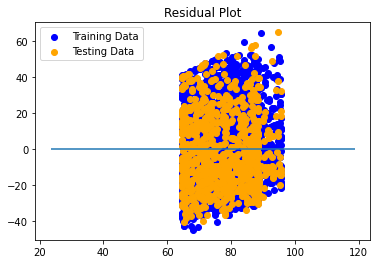

In [19]:
# Plot the Residuals for the Training and Testing data


plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [20]:
# #DROPPING DeviceProtection_No internet service to test
# df3 = df2.drop(columns=['DeviceProtection_No internet service'])


In [21]:
def calculate_vif(df):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = df.columns
    for i in range(0, x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

# X=df.drop(['Salary'],axis=1)
calculate_vif(X)

,Var,Vif
0,SeniorCitizen,1.14
1,tenure,1.14


In [22]:
sc =  StandardScaler()
X_scaler = sc.fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

X_train

array([[-0.49816697, -1.18333749],
       [ 2.00735912, -1.22403339],
       [ 2.00735912, -1.22403339],
       ...,
       [-0.49816697,  0.03753958],
       [ 2.00735912,  0.60728222],
       [-0.49816697, -1.30542519]])

In [23]:
#Save model as pickle file
with open('model_pickle', 'wb') as f:
    pickle.dump(model,f)
